# Predicting Net Gain: How Should Advertisers Choose to Spend their Money?

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
ads = pd.read_csv("C:\\Users\\nicol\\TDI\\CodingChallenge\\advertisement_netgain.csv")
ads.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [31]:
#checking for null values
ads.isnull().sum()

id                                   0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [3]:
labelencoder = LabelEncoder()

In [32]:
#defining a preprocessing function to convert key features to continuous data types
def preprocessing (ads):
    ads.drop(axis = 1, columns = ['id'], inplace = True)
    #correcting misspelling
    ads.rename(columns = {'realtionship_status':'relationship_status'}, inplace = True)
    
    expense_dict = {'Low':0, 'Medium':1, 'High':2}
    ads['expensive'] = ads['expensive'].map(expense_dict, 'ignore')
    
    airtime_dict = {'Primetime':0, 'Morning':1, 'Daytime':2}
    ads['airtime'] = ads['airtime'].map(airtime_dict, 'ignore')
    
    genre_dict = {'Comedy':0, 'Infomercial': 1, 'Drama': 2, 'Direct': 3, 'Other':4}
    ads['genre'] = ads['genre'].map(genre_dict, 'ignore')
    
    industry_dict = {'Auto':0, 'Pharma':1, 'Entertainment':2, 'Political':3, 'ClassAction':4,
                     'Other':5}
    ads['industry'] = ads['industry'].map(industry_dict, 'ignore')
    
    ads['airlocation'] = ads['airlocation'].apply(lambda x: '1' if 'United-States' in x else '0')
    #ds['airlocation'] = ads['airlocation'].astype(int)
    
    #combining categories from 7 to 4
    relationship_dict = {'Married-spouse-absent':'Separated', 'Divorced': 'Separated',
                         'Separated': 'Separated', 'Married-civ-spouse': 'Married',
                         'Married-AF-spouse': 'Married', 'Never-married':'Single',
                         'Widowed':'Widowed'}                     
    ads['relationship_status'] = ads['relationship_status'].map(relationship_dict, 'ignore')
    
    encoding_dict = {'Separated':0, 'Married':1, 'Single':2, 'Widowed':3}
    ads['relationship_status'] = ads['relationship_status'].map(encoding_dict, 'ignore')
    
    #Label Encoding dichotomous variables to int type
    #1:male, 0:female
    ads['targeted_sex']= labelencoder.fit_transform(ads['targeted_sex'])
    #1:yes, 0:no
    ads['money_back_guarantee']= labelencoder.fit_transform(ads['money_back_guarantee'])
    
    ads['ratings'] = ads['ratings'].astype(int)
      
    return ads

new_ads = preprocessing(ads)
new_ads.head()

,relationship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,0,0,0,1,45,0,1,0,2,0,False
1,1,1,0,1,45,0,1,0,0,0,False
2,0,2,0,0,45,0,1,0,2,1,False
3,0,3,1,0,40,0,1,0,0,0,False
4,1,1,0,1,48,0,1,0,2,0,True


In [33]:
new_ads.describe()

,relationship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,ratings,expensive,money_back_guarantee
count,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000
mean,1.205889,1.449631,0.221092,0.662047,40.294111,0.470708,0.005490,0.676981,0.501881
std,0.772279,1.369444,0.627670,0.473022,12.479457,0.626382,0.073891,0.881816,0.500006
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,40.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,2.000000,0.000000,1.000000,45.000000,1.000000,0.000000,2.000000,1.000000
max,3.000000,5.000000,4.000000,1.000000,99.000000,2.000000,1.000000,2.000000,1.000000


## Data Visualization

Correlation Matrix:

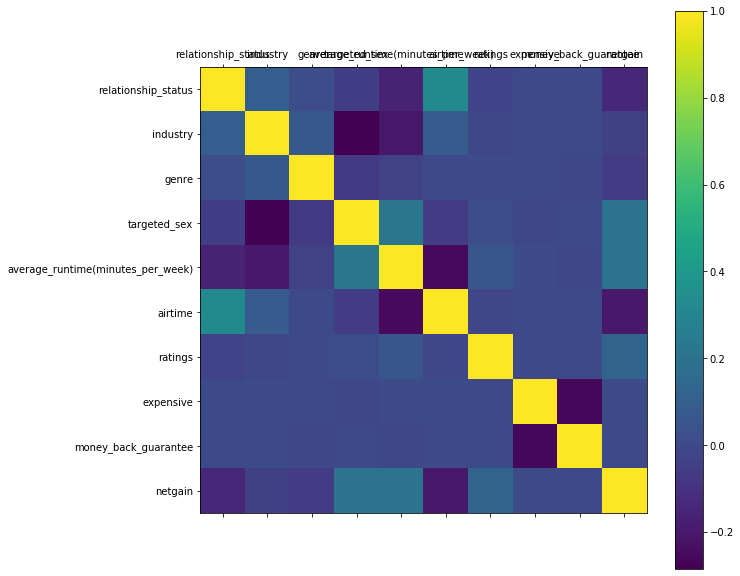

In [36]:
f = plt.figure(figsize=(10, 10))
plt.matshow(new_ads.corr(),fignum = f.number)
corr = new_ads.corr()
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

## Visualization of the Target Variable

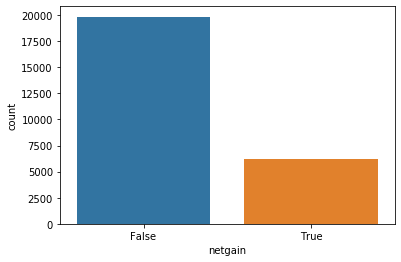

In [22]:
sns.countplot(new_ads['netgain'])

Advertisements in this dataset produce more instances of no gain in comparison to positive net gain. 

## Simple Visualizations

#1

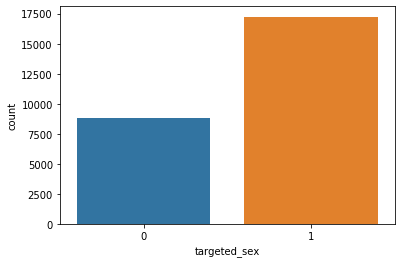

In [26]:
sns.countplot(new_ads['targeted_sex'])

Advertisements in this dataset target men at a higher rate then women. 

#2

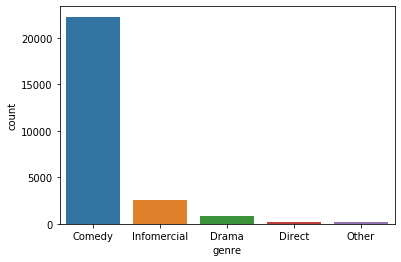

In [28]:
sns.countplot(new_ads['genre'])

Advertisements in this dataset used comedy most frequently in selling products

## A closer look at the relationships between key variables

#1

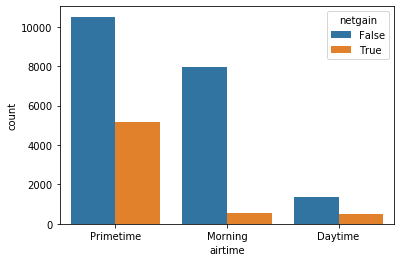

In [13]:
import seaborn as sns
sns.countplot(new_ads['airtime'], hue = new_ads['netgain'])

A visual examination of the count plot indicated that advertisements shown during prime time (middle evening/during television shows) have the highest chance of achieving a positive net gain, however ads during this time may also have low accuracy (as suggested by the large lack of net gain during this time). <br/>
Daytime advertisements, though representing a small portion of net gain, have a smaller discrepancy between no net gain (false) and a positive net gain (true) in comparison to prime time and morning airtime. This may suggest a higher benefit to advertising during daytime when the advertiser's goal is to maximize gain during minimal airtime, and to advertising during primetime when the goal is achieving high rates of gain regardless of failure rates (no net gain). 

#2

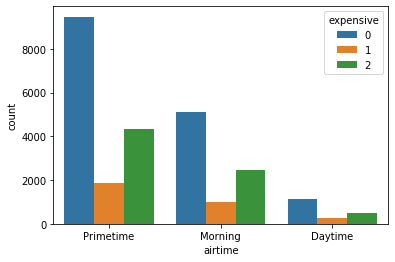

In [20]:
sns.countplot(new_ads['airtime'], hue = new_ads['expensive'])

Building off of the previous inferences regarding airtime (primetime, morning airtime, and daytime), this visualization is directed towards analyzing how expensive products are that are being advertised during these times. This plot indicates that lower costing (0) products are advertised the most during all times, where the highest instances occur during primetime. <br/>
At the middle level of cost (1), products are being advertised at a lower rate than low and high cost products. This data may inform advertising efforts when advertisors are seeking novelty. For example, if a product is a low-cost product, it may 'stand out' more during the day time, when low-cost products are the least common. 

#3

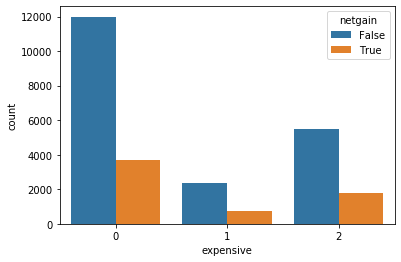

In [21]:
sns.countplot(new_ads['expensive'], hue = new_ads['netgain'])

As the cost of the product being advertised (i.e. expensive) was analyzed previously, further visualization aims to determine whether product cost is related to the target variable, net gain. </br>
It appears that low-cost products have the highest occurance of a positive net gain in comparison to both mid and high-level costing products. 

#4

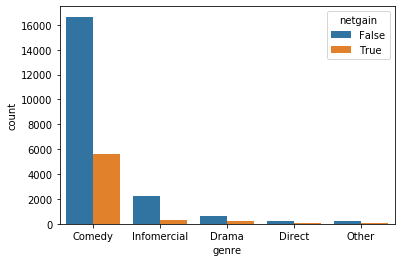

In [15]:
sns.countplot(new_ads['genre'], hue = new_ads['netgain'])

The use of comedy in advertisements also produced the highest occurances of net gain in comparison to alternative methods such as infomercials, drama, direct discussion of the product, or other methods. The high level of no net gain depicted in the count plot may be a result of the disproportionate rates of comedy advertisements along with high rates of no net gain. 

#6

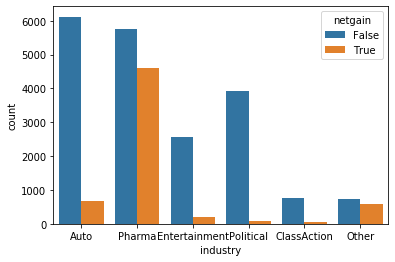

In [16]:
sns.countplot(new_ads['industry'], hue = new_ads['netgain'])

Further examination of the industries advertising and their corresponding net gain indicates pharmaceutical adverisements have the highest rate of positive net gain with a low ratio of no net gain. <br/>
Automobile advertisements, however, have the highest level of failure to produce net gain in comparison to other industries such as pharmaceuticals, political ads, class actions, and other advertisement types. 

#7

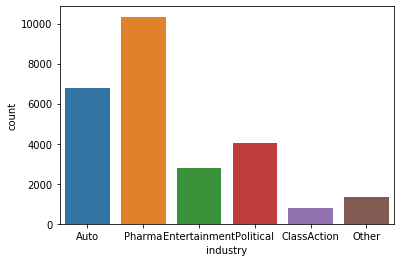

In [25]:
sns.countplot(new_ads['industry'])

The most common industry advertised is pharmaceuticals

#8

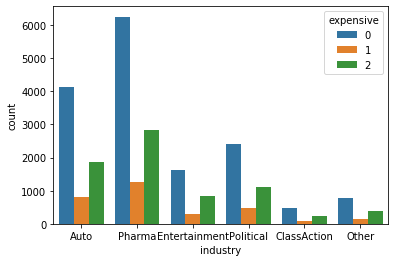

In [24]:
sns.countplot(new_ads['industry'], hue = new_ads['expensive'])

To further examine the industry tactics in selling, a count plot was produced depicting each industry's propensity to sell low, middle, and high cost products. <br/>
Pharmaceutical companies tend to sell the highest levels of all products. This is a result of the high rates of pharmaceutical ads aired that is depicted in the previous plot. This result, taken with the previous industry visualizations, may suggest that pharmaceutical ads have the highest rate of success using televised ads. Other industries may benefit further from alternative methods of advertising. 